In [169]:
import numpy as np
import pandas as pd

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

# command for work offline
plotly.offline.init_notebook_mode(connected=True)


In [170]:
%%time
df = pd.read_csv('downloads/heart_2020_10K_outliersremovedIQRmethod4.csv')


CPU times: user 31 ms, sys: 18.5 ms, total: 49.5 ms
Wall time: 102 ms


In [171]:
df.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,WeightStatus,SleepQuality,PhysicalHealth_Cat,MentalHealth_Cat
5803,Yes,28.89,No,No,No,0.0,0.0,No,Male,65-69,...,Yes,Good,9.0,No,No,No,Overweight,GoodSleep,0-5,0-5
9382,No,26.45,No,No,No,0.0,0.0,No,Female,60-64,...,No,Very good,6.0,No,No,No,Overweight,SleepDeprived,0-5,0-5
6714,No,27.98,No,No,No,0.0,0.0,No,Male,45-49,...,Yes,Very good,7.0,No,No,No,Overweight,GoodSleep,0-5,0-5
3441,No,29.29,Yes,No,No,0.0,0.0,No,Male,70-74,...,Yes,Good,6.0,No,No,No,Overweight,SleepDeprived,0-5,0-5
5861,Yes,25.11,No,No,No,0.0,0.0,Yes,Male,80 or older,...,No,Very good,7.0,No,No,No,Overweight,GoodSleep,0-5,0-5


In [172]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'WeightStatus', 'SleepQuality',
       'PhysicalHealth_Cat', 'MentalHealth_Cat'],
      dtype='object')

In [173]:


df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   HeartDisease        10000 non-null  object 
 1   BMI                 10000 non-null  float64
 2   Smoking             10000 non-null  object 
 3   AlcoholDrinking     10000 non-null  object 
 4   Stroke              10000 non-null  object 
 5   PhysicalHealth      10000 non-null  float64
 6   MentalHealth        10000 non-null  float64
 7   DiffWalking         10000 non-null  object 
 8   Sex                 10000 non-null  object 
 9   AgeCategory         10000 non-null  object 
 10  Race                10000 non-null  object 
 11  Diabetic            10000 non-null  object 
 12  PhysicalActivity    10000 non-null  object 
 13  GenHealth           10000 non-null  object 
 14  SleepTime           10000 non-null  float64
 15  Asthma              10000 non-null  object 
 16  Kidne

In [174]:
# Basic descriptive statistics for each column
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,27.866266,0.558000,1.119700,7.143800
std,5.712666,1.442929,2.405525,1.268102
min,12.970000,0.000000,0.000000,1.000000
25%,23.810000,0.000000,0.000000,6.000000
50%,27.120000,0.000000,0.000000,7.000000
75%,30.900000,0.000000,1.000000,8.000000
max,53.460000,8.000000,12.000000,14.000000


In [175]:
df.shape


(10000, 22)

In [176]:
def missing_data(data):
    null_columns = data.columns[data.isnull().any()]
    return data[null_columns].isnull().sum()

missing_data(df)

Series([], dtype: float64)

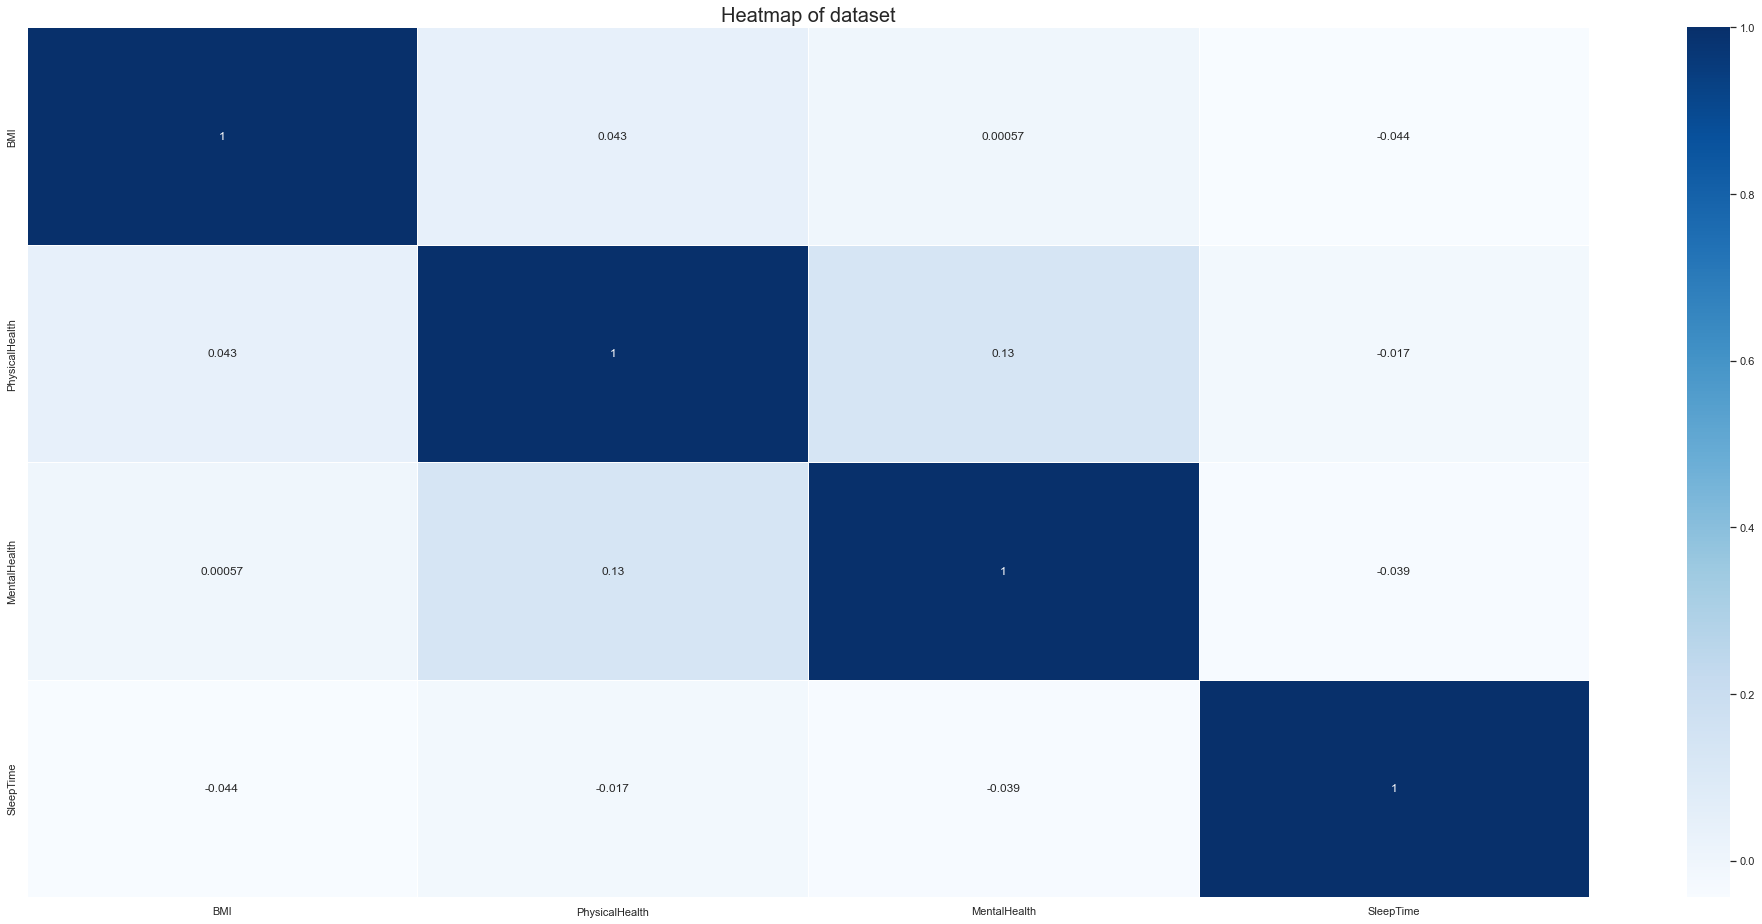

In [177]:
# Correlation heatmap beetween the columns
plt.rcParams['figure.figsize']=(35,16)
hm=sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap='Blues')
hm.set_title(label='Heatmap of dataset', fontsize=20)
hm;

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

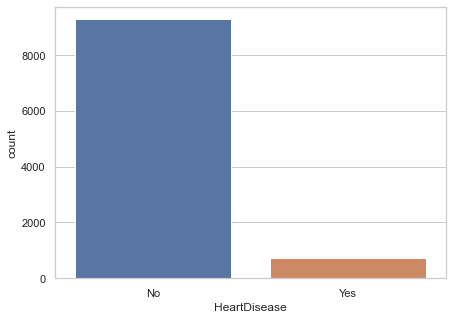

In [178]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=[7, 5])
sns.countplot(x = "HeartDisease", data = df)


In [179]:
df['HeartDisease'].value_counts()

No     9270
Yes     730
Name: HeartDisease, dtype: int64

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

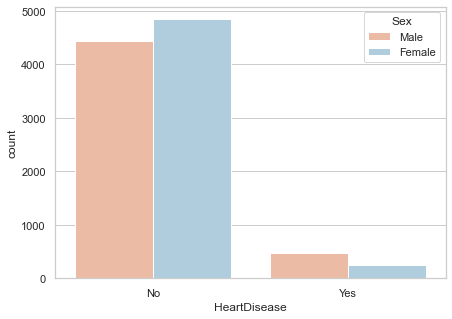

In [180]:
fig, ax = plt.subplots(figsize=[7, 5])
palette = sns.color_palette("RdBu", n_colors=2)
sns.countplot(x = "HeartDisease", hue = "Sex", data = df, palette = palette)

In [181]:


df['AgeCategory'].describe()



count     10000
unique       13
top       65-69
freq       1082
Name: AgeCategory, dtype: object

In [182]:
df['AgeCategory'].value_counts()[ : 10]

65-69          1082
70-74          1027
60-64          1024
55-59           962
80 or older     779
50-54           770
45-49           678
35-39           670
75-79           650
18-24           623
Name: AgeCategory, dtype: int64

<AxesSubplot:xlabel='AgeCategory', ylabel='count'>

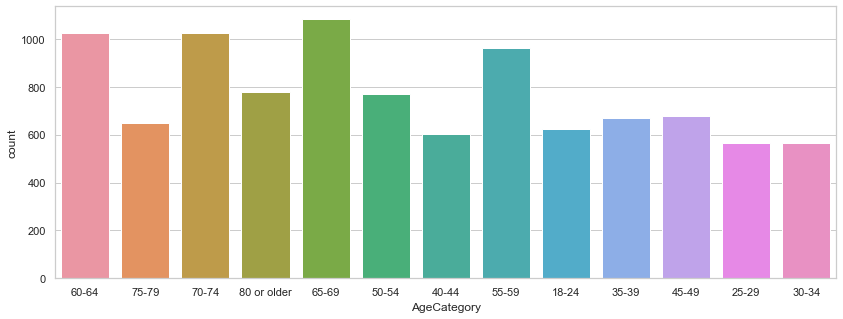

In [183]:
fig, ax = plt.subplots(figsize=[14, 5])
sns.countplot(x = "AgeCategory", data = df)

<AxesSubplot:xlabel='Smoking', ylabel='count'>

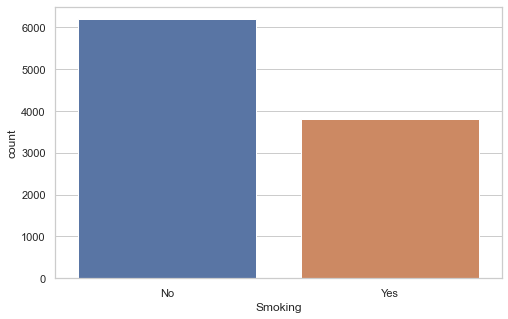

In [184]:
fig, ax = plt.subplots(figsize=[8, 5])
sns.countplot(x = "Smoking", data = df)

<AxesSubplot:xlabel='AlcoholDrinking', ylabel='count'>

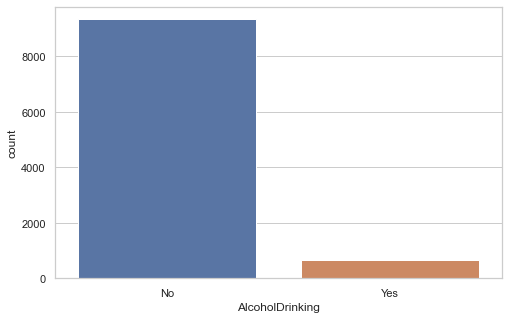

In [185]:
fig, ax = plt.subplots(figsize=[8, 5])
sns.countplot(x = "AlcoholDrinking", data = df)

<AxesSubplot:xlabel='Stroke', ylabel='count'>

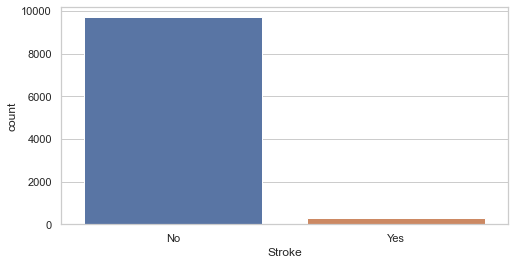

In [186]:
fig, ax = plt.subplots(figsize=[8, 4])
sns.countplot(x = "Stroke", data = df)

<AxesSubplot:xlabel='PhysicalHealth', ylabel='count'>

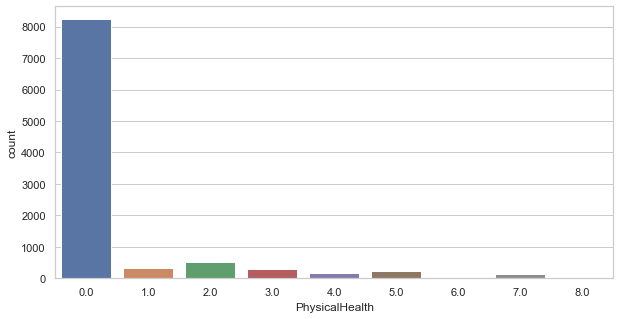

In [187]:
fig, ax = plt.subplots(figsize=[10, 5])
sns.countplot(x = "PhysicalHealth", data = df)

<AxesSubplot:xlabel='MentalHealth', ylabel='count'>

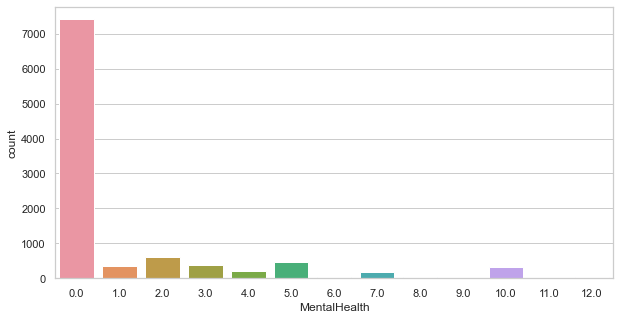

In [188]:
fig, ax = plt.subplots(figsize=[10, 5])
sns.countplot(x = "MentalHealth", data = df)

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

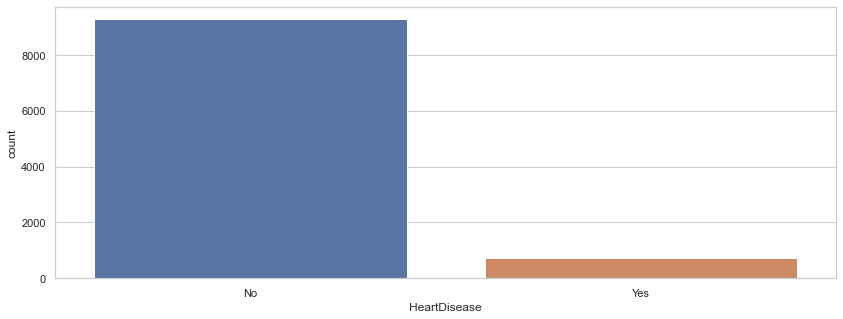

In [189]:
fig, ax = plt.subplots(figsize=[14, 5])
sns.countplot(x = "HeartDisease", data = df)

<AxesSubplot:xlabel='DiffWalking', ylabel='count'>

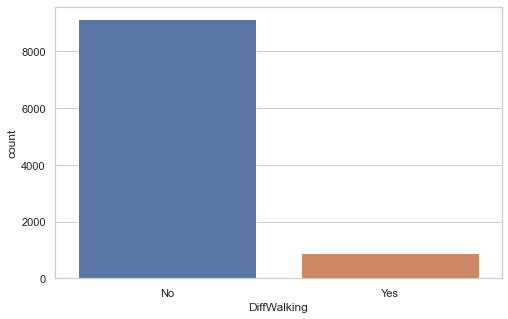

In [190]:
fig, ax = plt.subplots(figsize=[8, 5])
sns.countplot(x = "DiffWalking", data = df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

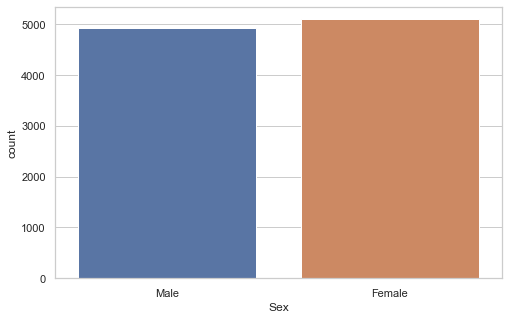

In [191]:
fig, ax = plt.subplots(figsize=[8, 5])
sns.countplot(x = "Sex", data = df)

<AxesSubplot:xlabel='AgeCategory', ylabel='count'>

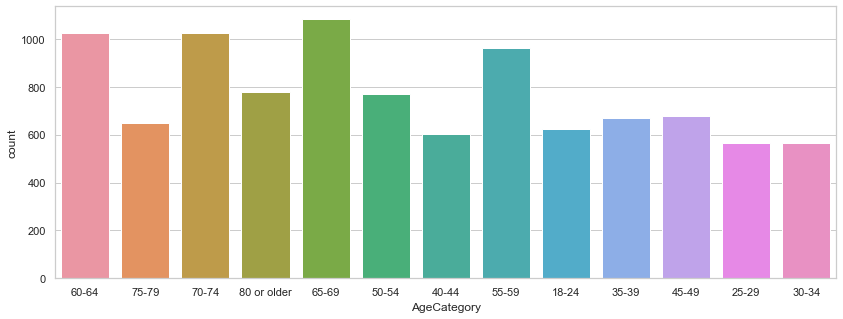

In [192]:
fig, ax = plt.subplots(figsize=[14, 5])
sns.countplot(x = "AgeCategory", data = df)

<AxesSubplot:xlabel='Race', ylabel='count'>

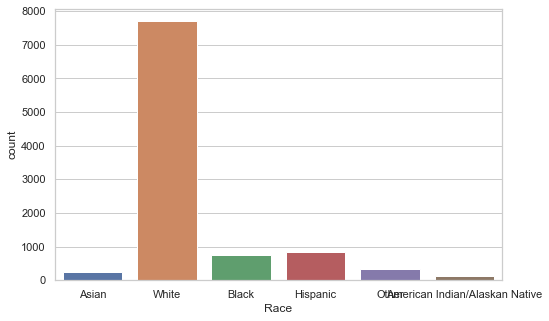

In [193]:
fig, ax = plt.subplots(figsize=[8, 5])
sns.countplot(x = "Race", data = df)

<AxesSubplot:xlabel='Diabetic', ylabel='count'>

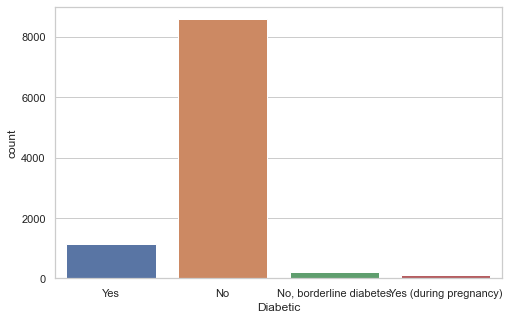

In [194]:
fig, ax = plt.subplots(figsize=[8, 5])
sns.countplot(x = "Diabetic", data = df)

<AxesSubplot:xlabel='PhysicalActivity', ylabel='count'>

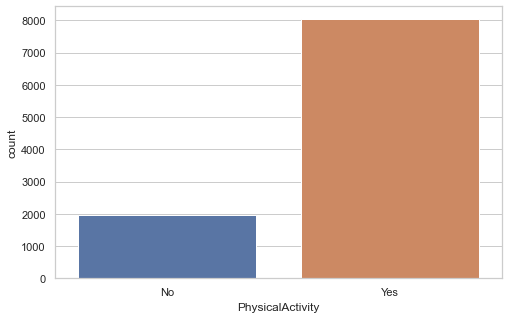

In [195]:
fig, ax = plt.subplots(figsize=[8, 5])
sns.countplot(x = "PhysicalActivity", data = df)

<AxesSubplot:xlabel='SleepTime', ylabel='count'>

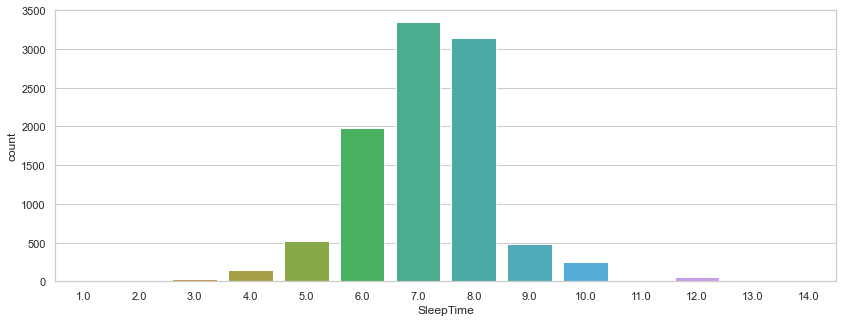

In [196]:
fig, ax = plt.subplots(figsize=[14, 5])
sns.countplot(x = "SleepTime", data = df)

<AxesSubplot:xlabel='Asthma', ylabel='count'>

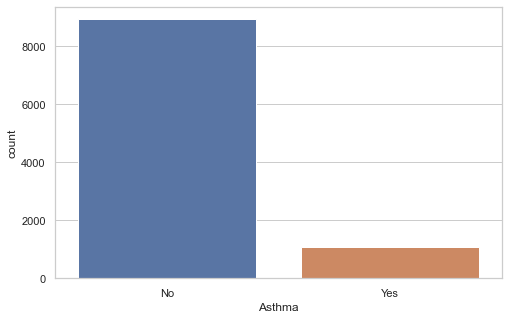

In [197]:
fig, ax = plt.subplots(figsize=[8, 5])
sns.countplot(x = "Asthma", data = df)

<AxesSubplot:xlabel='KidneyDisease', ylabel='count'>

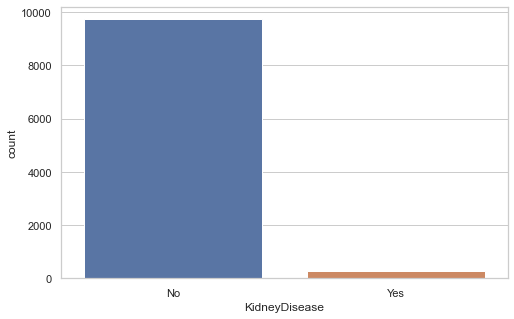

In [198]:
fig, ax = plt.subplots(figsize=[8, 5])
sns.countplot(x = "KidneyDisease", data = df)

<AxesSubplot:xlabel='SkinCancer', ylabel='count'>

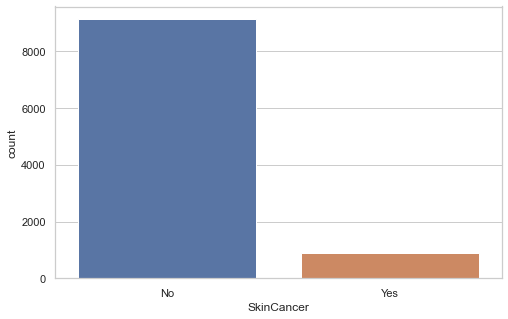

In [199]:
fig, ax = plt.subplots(figsize=[8, 5])
sns.countplot(x = "SkinCancer", data = df)

<AxesSubplot:xlabel='WeightStatus', ylabel='count'>

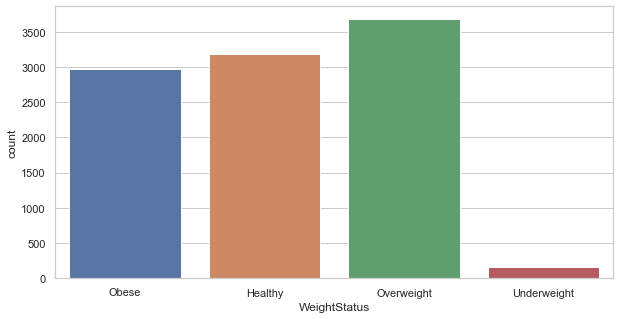

In [200]:
fig, ax = plt.subplots(figsize=[10, 5])
sns.countplot(x = "WeightStatus", data = df)

<AxesSubplot:xlabel='SleepQuality', ylabel='count'>

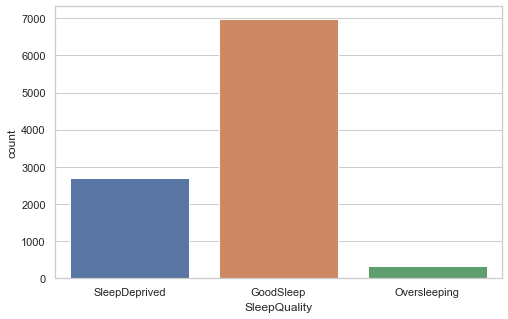

In [201]:
fig, ax = plt.subplots(figsize=[8, 5])
sns.countplot(x = "SleepQuality", data = df)

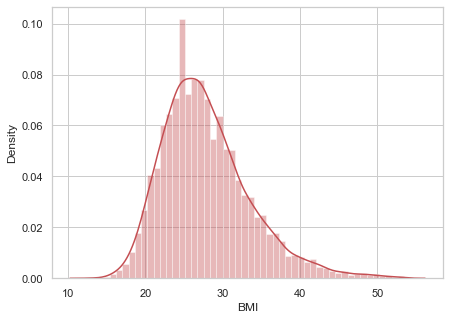

In [202]:
fig, axe = plt.subplots(figsize = [7, 5])
sns.distplot(df['BMI'], color = 'r');


In [203]:
trace = go.Histogram(x = df['AgeCategory'], name = 'AgeCategory', marker=dict(color='darkcyan'))

layout = go.Layout(
    title="Histogram Frequency Counts of Age"
)


fig = go.Figure(data=go.Data([trace]), layout=layout)
plotly.offline.iplot(fig, filename='histogram-freq-counts of ')

In [204]:
Underweight  = df[(df['BMI'] <= 18.5)]
Healthy = df[(df['BMI'] > 18.5) & (df['BMI'] <= 24.9)]
Overweight = df[(df['BMI'] > 24.9) & (df['BMI'] <= 29.9)]
Obese = df[df['BMI'] > 29.9]

In [205]:
x_ = ['Underweight', 'Healthy', 'Overweight', 'Obese']
y_ = [len(Underweight), len(Healthy), len(Overweight), len(Obese)]


In [206]:
trace = go.Bar(
    x=x_,
    y=y_,
    textposition = 'auto',
    name='target 0',
    marker=dict(
        color='rgba(255, 135, 141,0.7)',
        line=dict(
            color='rgba(255, 135, 141,1)',
            width=1.5),
        ),
    opacity=1
)


data = [trace]

plotly.offline.iplot(data, filename='bar-chart')


In [207]:
colors = ['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1']

trace = go.Pie(labels=x_, values=y_,
               hoverinfo='label+percent',
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

plotly.offline.iplot([trace], filename='pie-chart')

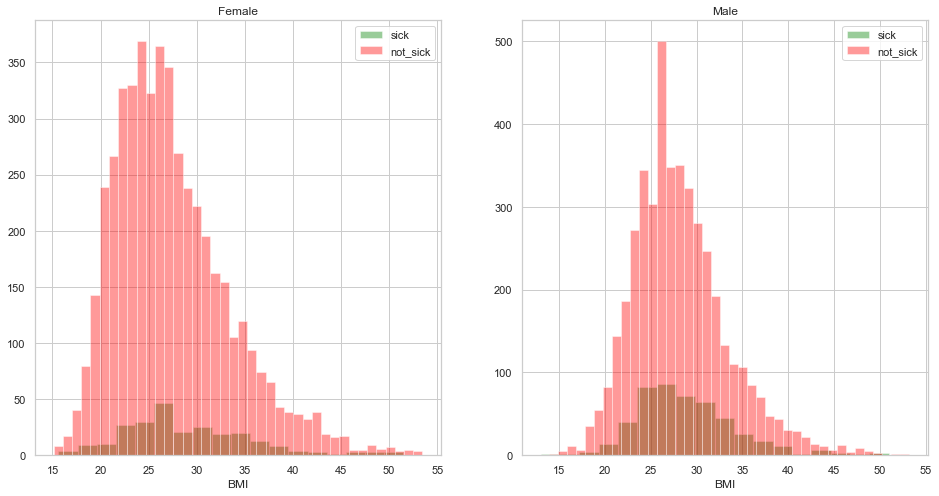

In [208]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 8))
women = df[df['Sex'] == "Female"]
men = df[df['Sex'] == "Male"]

ax = sns.distplot(women[women['HeartDisease'] == "Yes"].BMI, bins=18, label = 'sick', ax = axes[0], kde =False, color="green")
ax = sns.distplot(women[women['HeartDisease'] == "No"].BMI, bins=40, label = 'not_sick', ax = axes[0], kde =False, color="red")
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['HeartDisease']=="Yes"].BMI, bins=18, label = 'sick', ax = axes[1], kde = False, color="green")
ax = sns.distplot(men[men['HeartDisease']=="No"].BMI, bins=40, label = 'not_sick', ax = axes[1], kde = False, color="red")
ax.legend()
ax.set_title('Male');


In [209]:
df.groupby('BMI')['SleepTime'].mean()

BMI
12.97     6.0
13.87     8.0
14.37     8.0
14.92     5.0
15.11     6.0
         ... 
52.96     7.0
53.04    10.0
53.22     6.0
53.25     4.0
53.46     8.0
Name: SleepTime, Length: 1409, dtype: float64

In [210]:
df['Sex'].value_counts()/len(df)

Female    0.5089
Male      0.4911
Name: Sex, dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='count'>

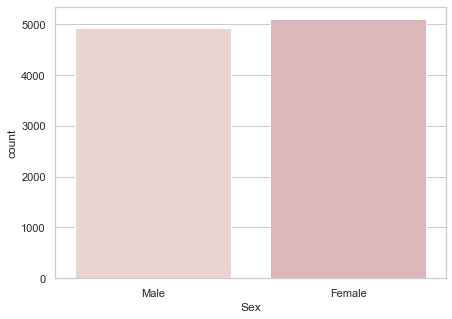

In [211]:
ax, figure = plt.subplots(figsize = [7,5])
sns.countplot(x = "Sex", data = df, palette = sns.cubehelix_palette(8))

In [212]:
# We will select randomly the same number of Male than Female and plot the distribution of sick people in function of their sex
nb_0 = df.loc[df['Sex'] == "Male", ['Sex']].count()[0]
nb_1 = df.loc[df['Sex'] == "Female", ['Sex']].count()[0]

print('Male   : ', nb_1)
print('Female : ', nb_0)

Male   :  5089
Female :  4911


In [213]:
df0 = df[df['Sex'] == "Male"].sample(nb_0)
df1 = df[df['Sex'] == "Female"].sample(nb_0)


In [214]:
print(df0.shape)
print(df1.shape)

(4911, 22)
(4911, 22)


In [215]:
# We concatenate df1 and df2
dfBis = pd.concat([df0,df1])


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

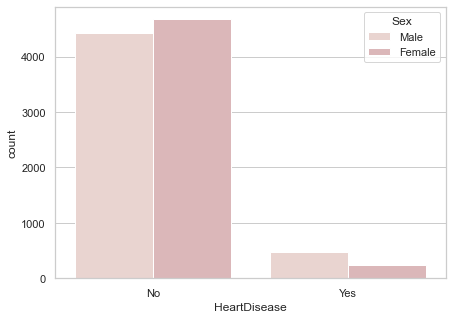

In [216]:
ax, figure = plt.subplots(figsize = [7,5])
sns.countplot(x = "HeartDisease", hue = "Sex", data = dfBis, palette = sns.cubehelix_palette(8))

In [217]:
df['SleepTime'].describe()

count    10000.000000
mean         7.143800
std          1.268102
min          1.000000
25%          6.000000
50%          7.000000
75%          8.000000
max         14.000000
Name: SleepTime, dtype: float64

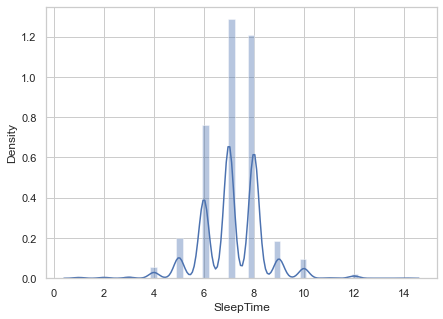

In [218]:
ax, figure = plt.subplots(figsize = [7,5])
sns.distplot(df['SleepTime'], color = 'b');


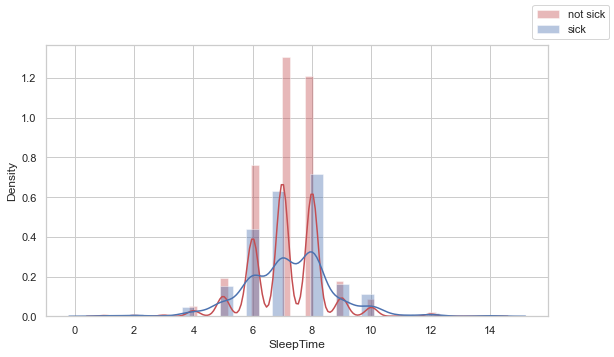

In [219]:
ax, figure = plt.subplots(figsize = [9,5])
sns.distplot(df[df['HeartDisease'] == "No"].SleepTime, label = "not sick", color = 'r');
sns.distplot(df[df['HeartDisease'] =="Yes"].SleepTime, label = "sick", color = 'b');
ax.legend()

In [220]:
df[df['HeartDisease'] == "No"]['SleepTime'].describe()


count    9270.000000
mean        7.135922
std         1.248356
min         1.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        14.000000
Name: SleepTime, dtype: float64

In [221]:
df[df['HeartDisease'] == "Yes"]['SleepTime'].describe()

count    730.000000
mean       7.243836
std        1.493744
min        1.000000
25%        6.000000
50%        7.000000
75%        8.000000
max       14.000000
Name: SleepTime, dtype: float64

In [222]:
trace0 = go.Box(
    x=df[df['HeartDisease'] == "No"].HeartDisease,
    y=df['SleepTime'],
    marker=dict(
        color='#FF851B'
    ),
    name='not_sick'
)

trace1 = go.Box(
    x=df[df['HeartDisease'] =="Yes"].HeartDisease,
    y=df['SleepTime'],
    marker=dict(
        color='#FF4136'
    ),
    name = 'sick'
)


plotly.offline.iplot([trace0, trace1], filename='pie-chart')

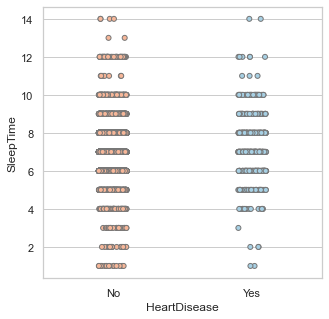

In [223]:
palette2 = sns.color_palette("RdBu", n_colors=2)
fig, ax2 = plt.subplots(figsize=[5, 5])
ax = sns.stripplot(x = "HeartDisease", y = "SleepTime", data = df, jitter=True, linewidth=1, palette = palette2);

<AxesSubplot:xlabel='Sex', ylabel='SleepTime'>

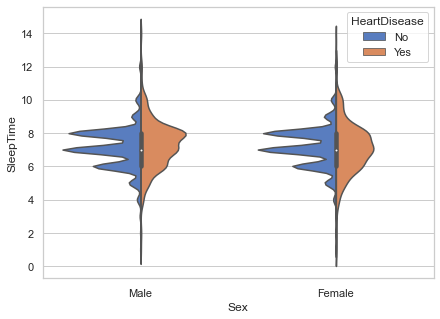

In [224]:
ax, figure = plt.subplots(figsize = [7, 5])
sns.violinplot(x = "Sex", y = "SleepTime", hue="HeartDisease", data = df, palette = "muted", split=True)

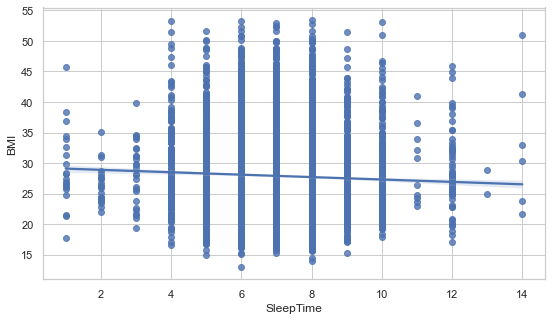

In [225]:
ax, figure = plt.subplots(figsize = [9,5])
sns.regplot(x="SleepTime", y="BMI", data=df);

In [226]:
trace = go.Scatter(
    x = df['SleepTime'],
    y = df['BMI'],
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(255, 182, 193, .9)',
        line = dict(
            width = 2,
        )
    )
)

data = [trace]

# Plot and embed in ipython notebook!
plotly.offline.iplot(data, filename='scatter')

In [227]:
df.groupby('AgeCategory')['BMI'].mean()

AgeCategory
18-24          25.369872
25-29          26.798110
30-34          27.798289
35-39          28.586164
40-44          28.847159
45-49          28.823864
50-54          28.752130
55-59          28.701091
60-64          28.276914
65-69          28.306765
70-74          27.752093
75-79          27.323723
80 or older    26.022696
Name: BMI, dtype: float64

<AxesSubplot:xlabel='AgeCategory', ylabel='BMI'>

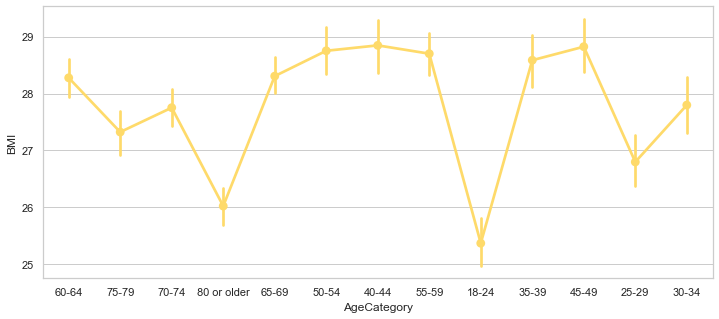

In [228]:
ax, figure = plt.subplots(figsize = [12,5])
sns.pointplot(x="AgeCategory", y="BMI", data=df, color = "#feda6a")

In [229]:
df['Smoking'].value_counts()/len(df)

No     0.6187
Yes    0.3813
Name: Smoking, dtype: float64

<AxesSubplot:xlabel='Smoking', ylabel='count'>

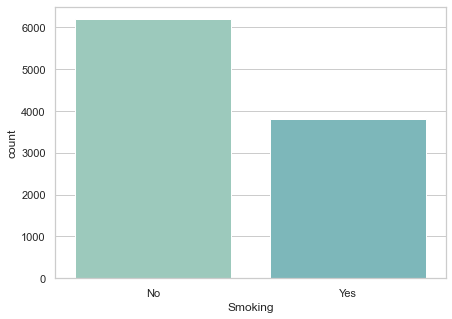

In [230]:
ax, figure = plt.subplots(figsize = [7, 5])
palette2 = sns.color_palette("GnBu_d")
sns.countplot(x = "Smoking", data = df, palette = palette2)

<AxesSubplot:xlabel='Smoking', ylabel='count'>

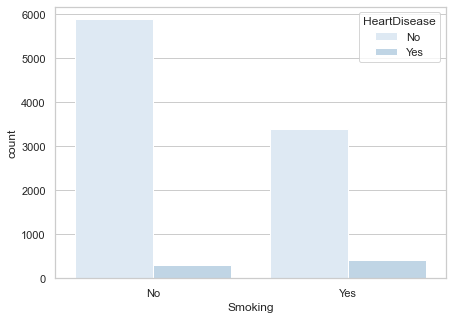

In [231]:
ax, figure = plt.subplots(figsize = [7, 5])
palette2 = sns.color_palette("Blues")
sns.countplot(x = "Smoking", hue = 'HeartDisease', data = df, palette = palette2)

<AxesSubplot:xlabel='BMI', ylabel='PhysicalHealth'>

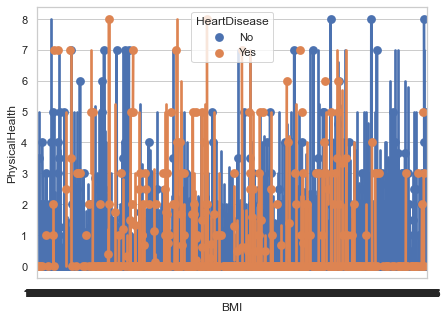

In [232]:
fig, ax = plt.subplots(figsize=[7, 5])
sns.pointplot(x = "BMI", y = "PhysicalHealth", hue = "HeartDisease", data = df)

<AxesSubplot:xlabel='PhysicalHealth', ylabel='BMI'>

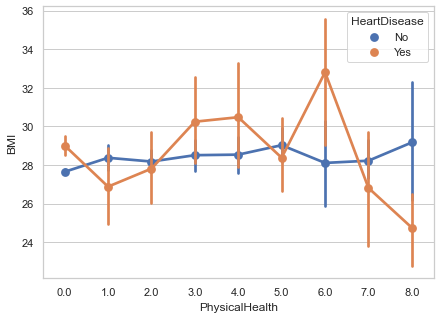

In [233]:
fig, ax = plt.subplots(figsize=[7, 5])
sns.pointplot(x = "PhysicalHealth", y = "BMI", hue = "HeartDisease", data = df)

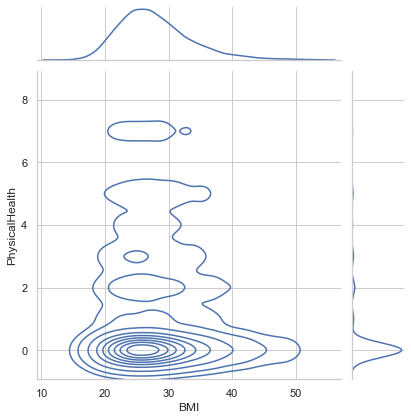

In [234]:
sns.jointplot(x = "BMI", y="PhysicalHealth", data=df, kind = 'kde')

<AxesSubplot:xlabel='HeartDisease', ylabel='BMI'>

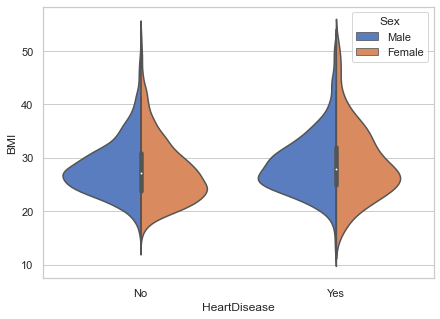

In [235]:
ax, figure = plt.subplots(figsize = [7, 5])
sns.violinplot(x = "HeartDisease", y = "BMI", hue="Sex", data = df, palette = "muted", split=True)

<AxesSubplot:xlabel='Sex', ylabel='BMI'>

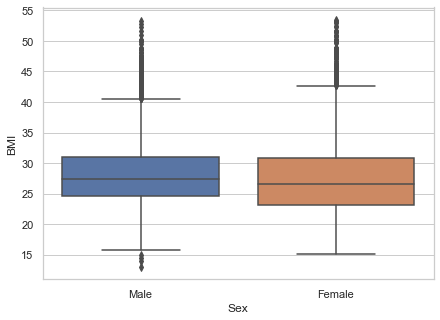

In [236]:
ax, figure = plt.subplots(figsize = [7,5])
sns.boxplot(x = 'Sex', y = 'BMI', data = df)

In [237]:
df['PhysicalHealth'].value_counts()/len(df)

0.0    0.8231
2.0    0.0522
1.0    0.0337
3.0    0.0308
5.0    0.0235
4.0    0.0153
7.0    0.0148
6.0    0.0038
8.0    0.0028
Name: PhysicalHealth, dtype: float64

<AxesSubplot:xlabel='PhysicalHealth', ylabel='count'>

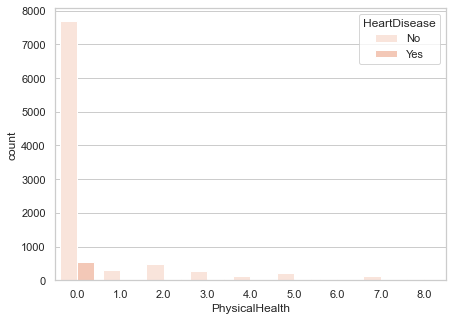

In [238]:
ax, figure = plt.subplots(figsize = [7,5])
sns.countplot(x = "PhysicalHealth", hue = 'HeartDisease', data = df, palette = sns.color_palette("Reds", 8))

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

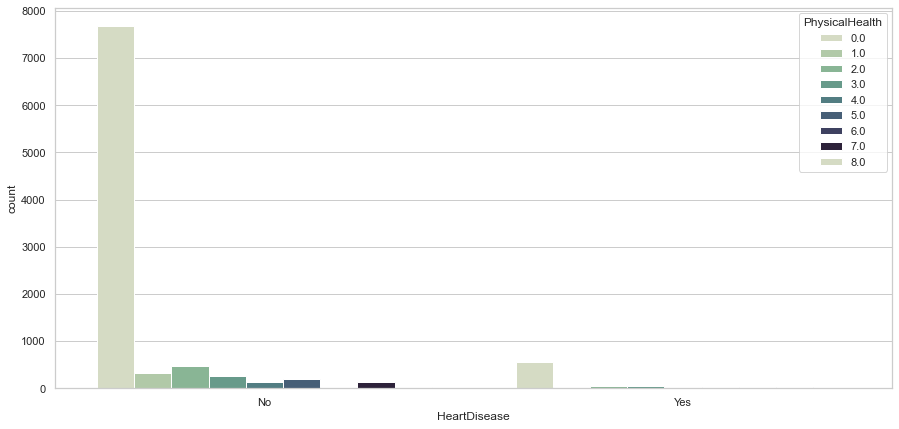

In [239]:
ax, figure = plt.subplots(figsize = [15,7])
sns.countplot(x = "HeartDisease", hue = 'PhysicalHealth', data = df, palette = sns.cubehelix_palette(8, start=.5, rot=-.75))

<AxesSubplot:xlabel='BMI', ylabel='HeartDisease'>

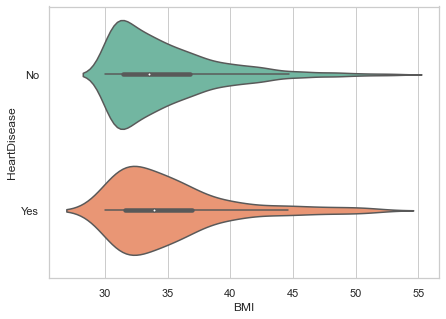

In [240]:
ax, figure = plt.subplots(figsize = [7,5])
sns.violinplot(x = "BMI", y = "HeartDisease", data = df[df['WeightStatus'] == "Obese"], palette = "Set2", split=True)

<AxesSubplot:xlabel='BMI', ylabel='WeightStatus'>

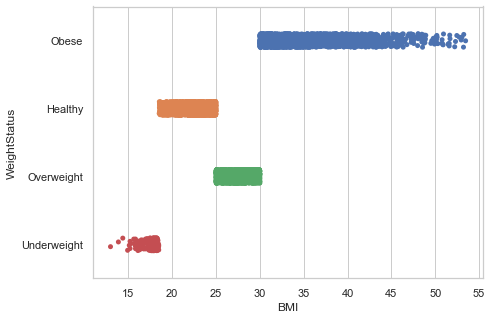

In [241]:
ax, figure = plt.subplots(figsize = [7,5])
sns.stripplot(x = "BMI", y = "WeightStatus", data = df)

<AxesSubplot:xlabel='BMI', ylabel='Density'>

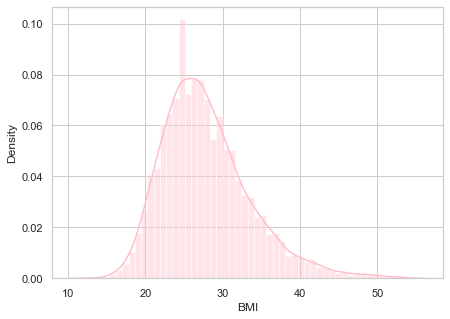

In [242]:
ax, figure = plt.subplots(figsize = [7,5])
sns.distplot(df['BMI'], color = "pink")

In [243]:
df['Smoking'].value_counts()

No     6187
Yes    3813
Name: Smoking, dtype: int64

<AxesSubplot:xlabel='Smoking', ylabel='count'>

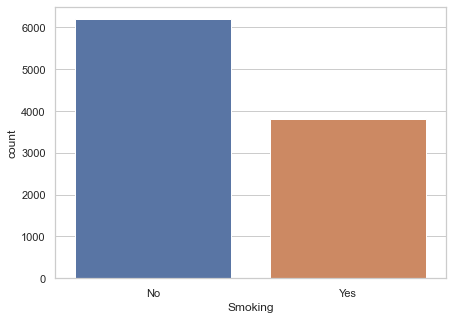

In [244]:
ax, figure = plt.subplots(figsize = [7,5])
sns.countplot(x = "Smoking", data = df)

<AxesSubplot:xlabel='Smoking', ylabel='count'>

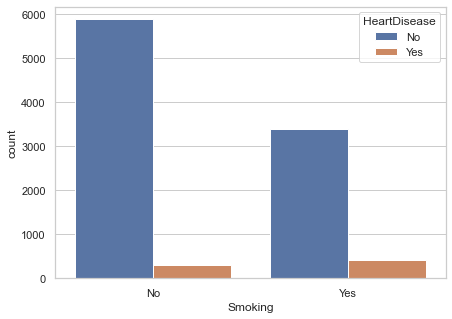

In [245]:
ax, figure = plt.subplots(figsize = [7,5])
sns.countplot(x = "Smoking", hue = "HeartDisease", data = df)

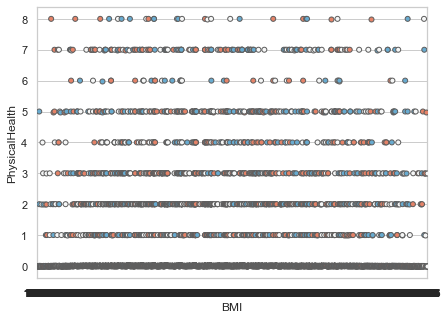

In [246]:
palette2 = sns.color_palette("RdBu", n_colors=3)
fig, ax2 = plt.subplots(figsize=[7, 5])
ax = sns.stripplot(x = "BMI", y = "PhysicalHealth", data = df, jitter=True, linewidth=1, palette = palette2);

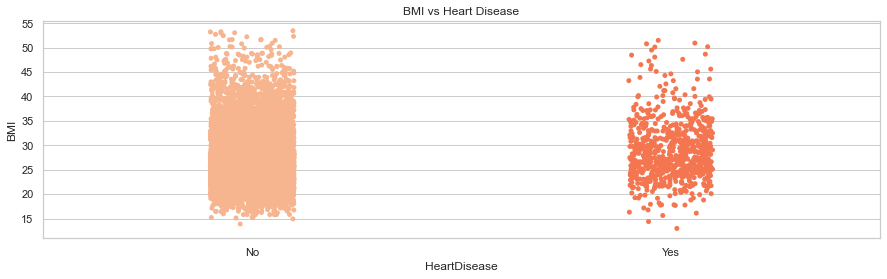

In [247]:
sns.set_palette('rocket_r')
plt.figure(figsize=(15, 4))
sns.stripplot(data=df, x='HeartDisease', y='BMI')
plt.title('BMI vs Heart Disease')
plt.xlabel('HeartDisease')
plt.ylabel('BMI')
plt.show()

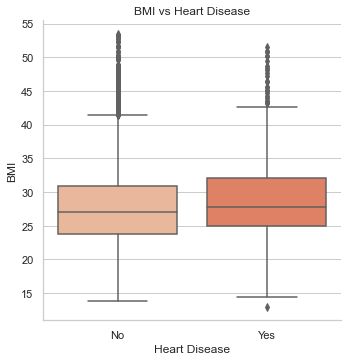

In [248]:
sns.catplot(data=df, x='HeartDisease', y='BMI', kind='box')
plt.title('BMI vs Heart Disease')
plt.ylabel('BMI')
plt.xlabel('Heart Disease')
plt.show()

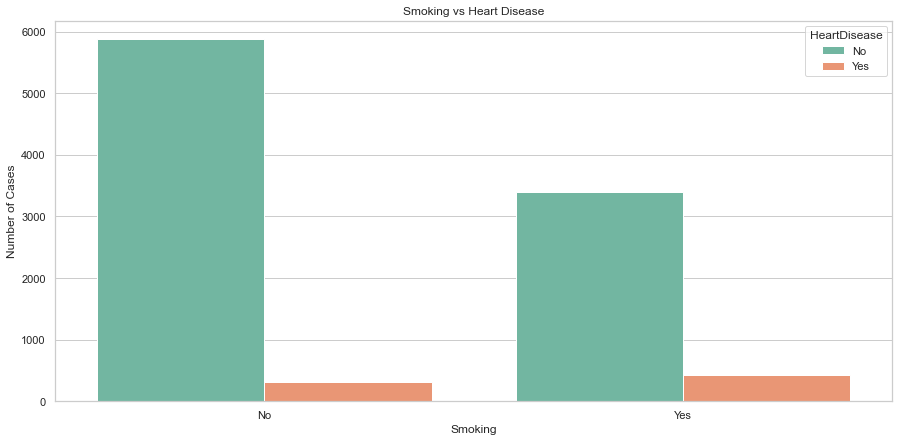

In [249]:
sns.set_palette("Set2")
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='Smoking', hue='HeartDisease',)
plt.title('Smoking vs Heart Disease')
plt.xlabel('Smoking')
plt.ylabel('Number of Cases')
plt.show()

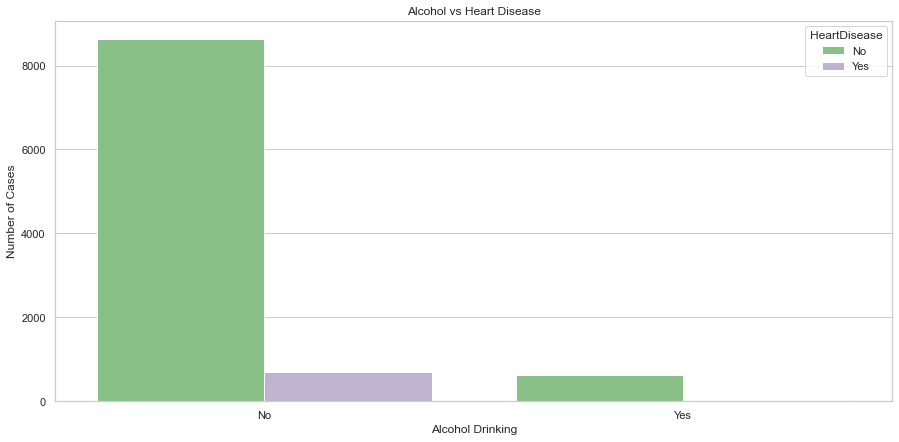

In [250]:
sns.set_palette('Accent')
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='AlcoholDrinking', hue='HeartDisease',)
plt.title('Alcohol vs Heart Disease')
plt.xlabel('Alcohol Drinking')
plt.ylabel('Number of Cases')
plt.show()

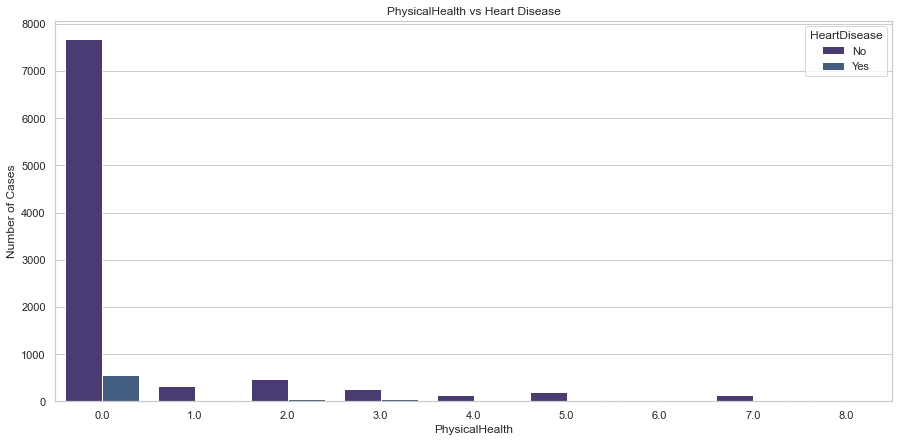

In [251]:
sns.set_palette('viridis')
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='PhysicalHealth', hue='HeartDisease')
plt.title('PhysicalHealth vs Heart Disease')
plt.xlabel('PhysicalHealth')
plt.ylabel('Number of Cases')
plt.show()

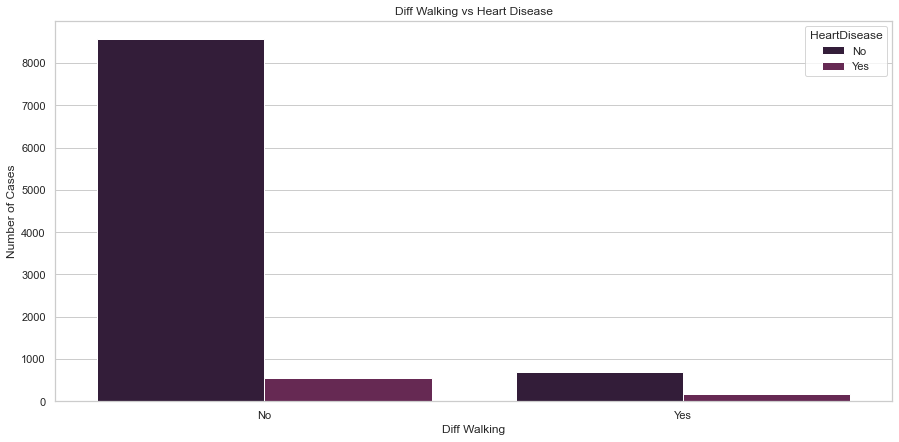

In [252]:
sns.set_palette('rocket')
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='DiffWalking', hue='HeartDisease')
plt.title('Diff Walking vs Heart Disease')
plt.xlabel('Diff Walking')
plt.ylabel('Number of Cases')
plt.show()

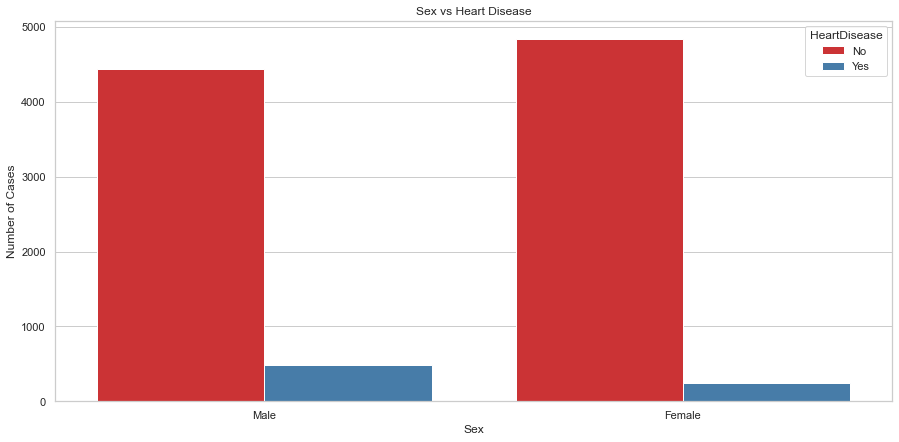

In [253]:
sns.set_palette('Set1')
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='Sex', hue='HeartDisease')
plt.title('Sex vs Heart Disease')
plt.xlabel('Sex')
plt.ylabel('Number of Cases')
plt.show()

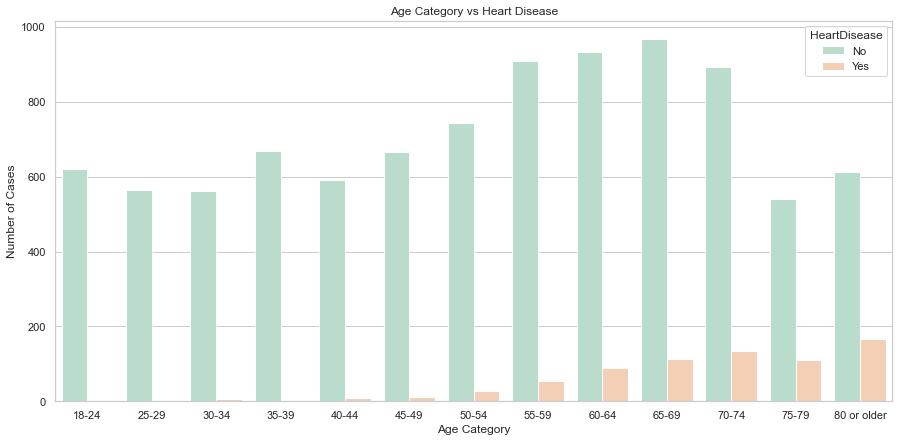

In [254]:
sns.set_palette('Pastel2')
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='AgeCategory', hue='HeartDisease', order=['18-24', '25-29', '30-34', '35-39', '40-44',
                                                                      '45-49', '50-54', '55-59', '60-64', '65-69',
                                                                      '70-74', '75-79', '80 or older'])
plt.title('Age Category vs Heart Disease')
plt.xlabel('Age Category')
plt.ylabel('Number of Cases')
plt.show()

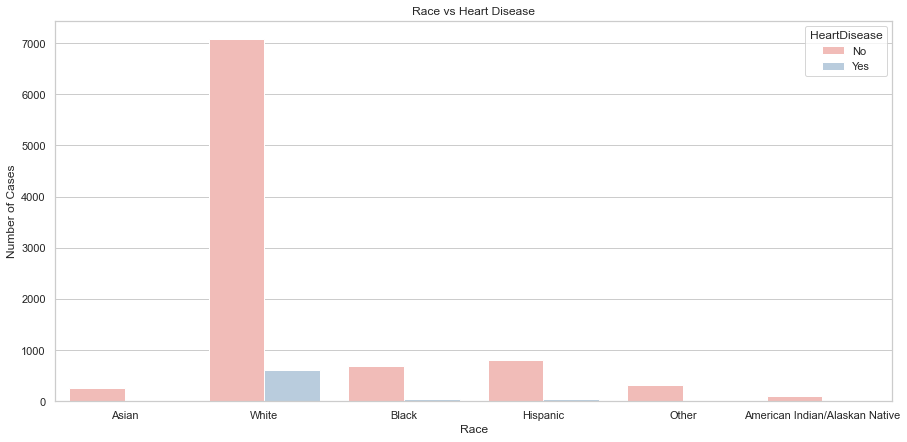

In [255]:
sns.set_palette('Pastel1')
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='Race', hue='HeartDisease')
plt.title('Race vs Heart Disease')
plt.xlabel('Race')
plt.ylabel('Number of Cases')
plt.show()

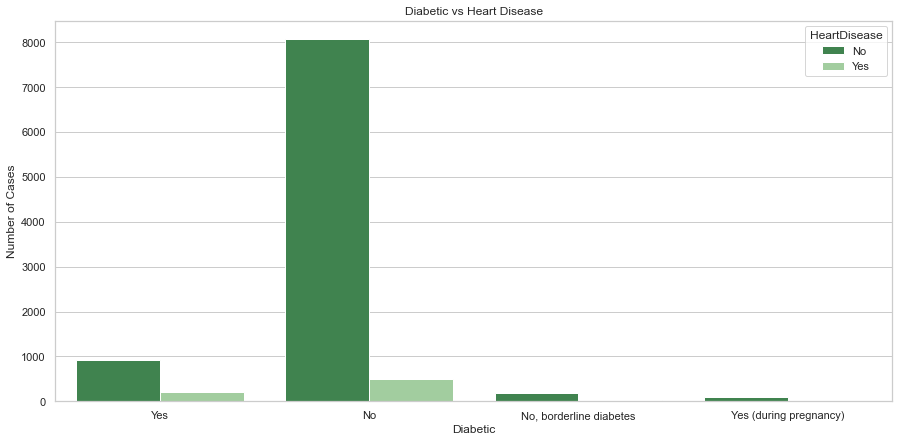

In [256]:
sns.set_palette('PRGn_r')
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='Diabetic', hue='HeartDisease')
plt.title('Diabetic vs Heart Disease')
plt.xlabel('Diabetic')
plt.ylabel('Number of Cases')
plt.show()

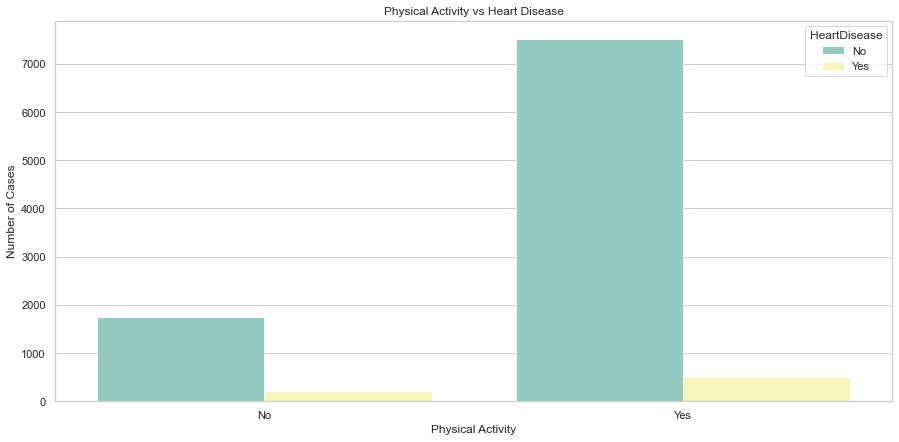

In [257]:
sns.set_palette('Set3')
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='PhysicalActivity', hue='HeartDisease')
plt.title('Physical Activity vs Heart Disease')
plt.xlabel('Physical Activity')
plt.ylabel('Number of Cases')
plt.show()

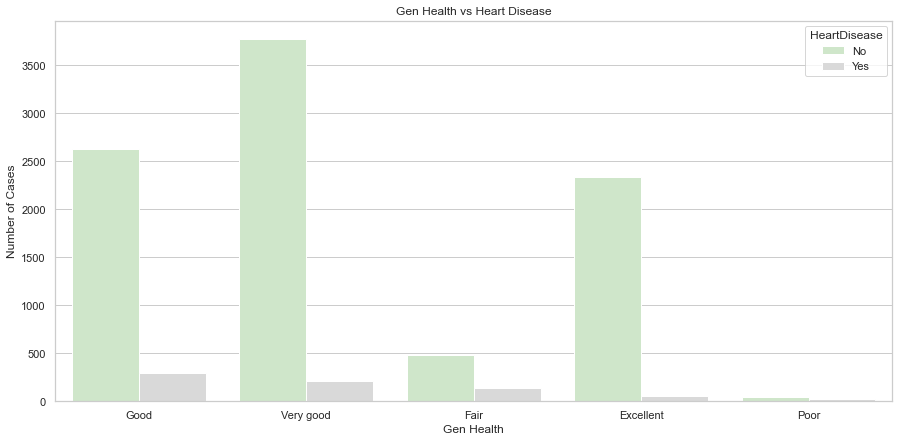

In [258]:
sns.set_palette('Set3_r')
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='GenHealth', hue='HeartDisease')
plt.title('Gen Health vs Heart Disease')
plt.xlabel('Gen Health')
plt.ylabel('Number of Cases')
plt.show()

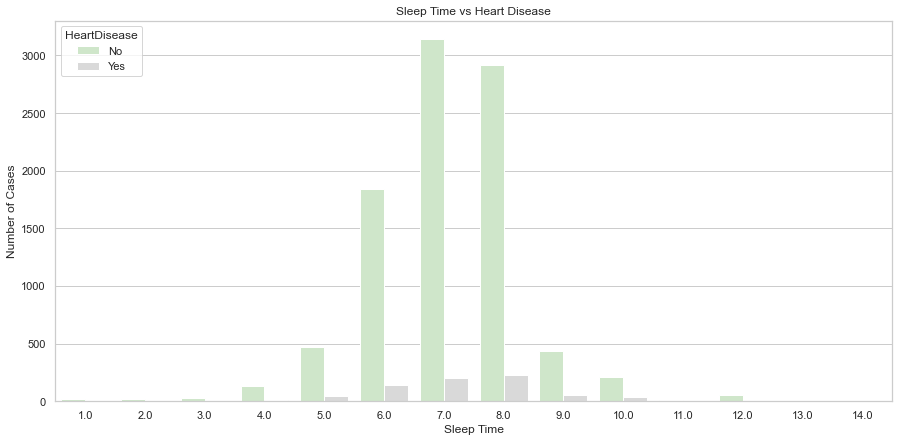

In [259]:
sns.set_palette('Set3_r')
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='SleepTime', hue='HeartDisease')
plt.title('Sleep Time vs Heart Disease')
plt.xlabel('Sleep Time')
plt.ylabel('Number of Cases')
plt.show()

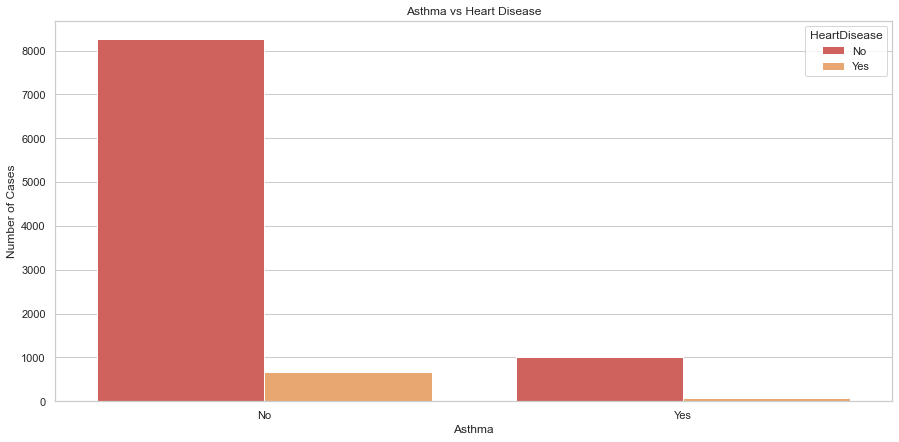

In [260]:
sns.set_palette('Spectral')
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='Asthma', hue='HeartDisease')
plt.title('Asthma vs Heart Disease')
plt.xlabel('Asthma')
plt.ylabel('Number of Cases')
plt.show()

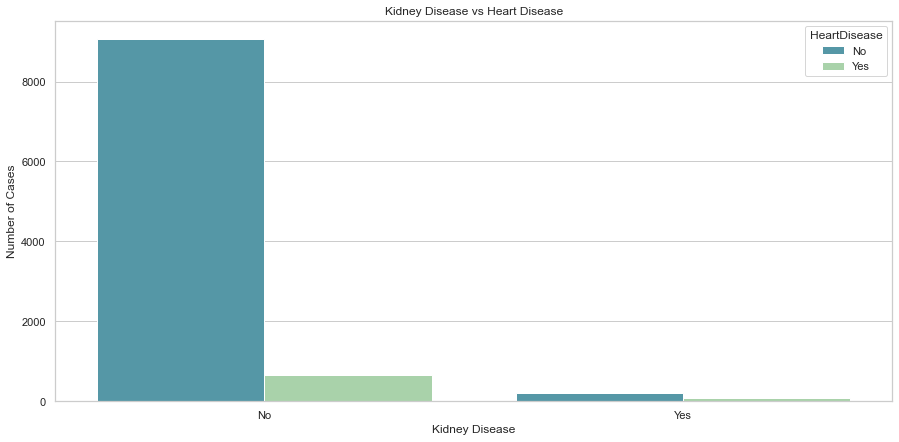

In [261]:
sns.set_palette('Spectral_r')
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='KidneyDisease', hue='HeartDisease')
plt.title('Kidney Disease vs Heart Disease')
plt.xlabel('Kidney Disease')
plt.ylabel('Number of Cases')
plt.show()

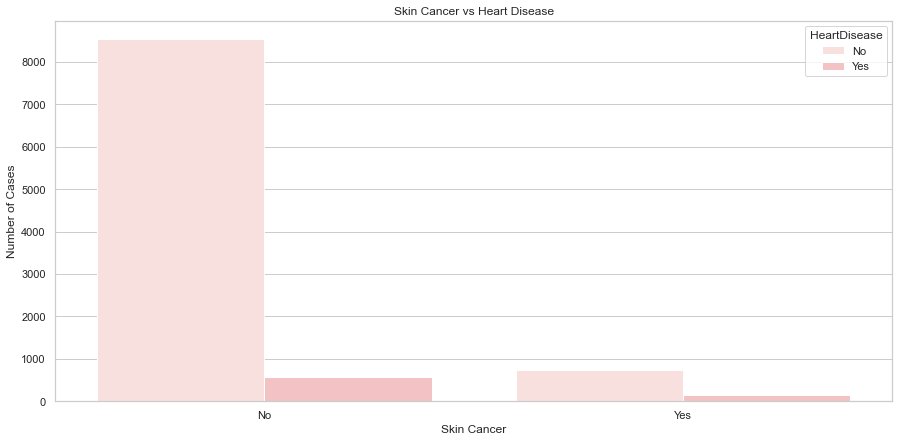

In [262]:
sns.set_palette('RdPu')
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='SkinCancer', hue='HeartDisease')
plt.title('Skin Cancer vs Heart Disease')
plt.xlabel('Skin Cancer')
plt.ylabel('Number of Cases')
plt.show()

In [263]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [264]:
#Getting dfs with only categorical and only numeric data
X.head(3)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,...,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,WeightStatus,SleepQuality,PhysicalHealth_Cat,MentalHealth_Cat
0,40.00,No,No,No,0.0,0.0,No,Male,60-64,Asian,...,No,Good,6.0,No,No,No,Obese,SleepDeprived,0-5,0-5
1,23.67,Yes,No,Yes,0.0,0.0,No,Male,75-79,White,...,Yes,Very good,9.0,No,No,Yes,Healthy,GoodSleep,0-5,0-5
2,23.34,No,No,No,0.0,0.0,No,Female,70-74,White,...,Yes,Good,7.0,No,Yes,Yes,Healthy,GoodSleep,0-5,0-5


In [265]:
y.head(3)

0     No
1     No
2    Yes
Name: HeartDisease, dtype: object

In [266]:
X_cat = X[['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory',
          'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']]
X_cat.head(2)

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,No,No,No,Male,60-64,Asian,Yes,No,Good,No,No,No
1,Yes,No,Yes,No,Male,75-79,White,No,Yes,Very good,No,No,Yes


In [267]:
X_num = X[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']]
X_num.head(2)

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,40.00,0.0,0.0,6.0
1,23.67,0.0,0.0,9.0


In [268]:
#Encoding Categorical Values
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix

In [269]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])],remainder='passthrough')
X_cat_encoded = ct.fit_transform(X_cat)

In [270]:
X_cat_encoded.shape

(10000, 46)

In [271]:
type(X_cat_encoded)

scipy.sparse.csr.csr_matrix

In [272]:
X_cat_encoded = X_cat_encoded.toarray()

In [273]:
X_cat_encoded.shape

(10000, 46)

In [274]:
X_cat_encoded[1]

array([0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1.])

In [275]:
X_cat_df = pd.DataFrame(X_cat_encoded)
X_cat_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [276]:
le = LabelEncoder()
y = le.fit_transform(y)

In [277]:
y.shape

(10000,)

In [278]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [279]:
#Scaling Numeric Values
sc = StandardScaler()
X_num_scaled = sc.fit_transform(X_num)

In [280]:
X_num_scaled.shape

(10000, 4)

In [281]:
type(X_num_scaled)

numpy.ndarray

In [282]:
X_num_scaled_df = pd.DataFrame(X_num_scaled, columns=['46', '47', '48', '49'])
X_num_scaled_df.head(3)

,46,47,48,49
0,2.124112,-0.386733,-0.465493,-0.902023
1,-0.734591,-0.386733,-0.465493,1.463836
2,-0.792361,-0.386733,-0.465493,-0.113403


In [283]:
#Concatenating numeric and categorical values
X_cat_df.reset_index(drop=True, inplace=True)
X_num_scaled_df.reset_index(drop=True, inplace=True)
X = pd.concat([X_cat_df, X_num_scaled_df], axis=1)
X.head(3)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,2.124112,-0.386733,-0.465493,-0.902023
1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,-0.734591,-0.386733,-0.465493,1.463836
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,-0.792361,-0.386733,-0.465493,-0.113403


In [284]:
X.shape

(10000, 50)

In [285]:
X = X.values

In [286]:
X

array([[ 1.        ,  0.        ,  1.        , ..., -0.38673274,
        -0.46549339, -0.90202311],
       [ 0.        ,  1.        ,  1.        , ..., -0.38673274,
        -0.46549339,  1.46383572],
       [ 1.        ,  0.        ,  1.        , ..., -0.38673274,
        -0.46549339, -0.1134035 ],
       ...,
       [ 1.        ,  0.        ,  1.        , ..., -0.38673274,
        -0.46549339,  0.67521611],
       [ 1.        ,  0.        ,  1.        , ..., -0.38673274,
        -0.46549339,  0.67521611],
       [ 1.        ,  0.        ,  1.        , ..., -0.38673274,
        -0.46549339, -0.1134035 ]])

In [287]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [288]:
y.shape

(10000,)

In [289]:
#Creating and Evaluating Models
#Logistic Regression
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
scores_log_reg = cross_val_score(log_reg, X, y, cv=10)
print(f'Mean: {np.mean(scores_log_reg)}')
print(f'Standard Deviation: {np.std(scores_log_reg)}')

Mean: 0.9277000000000001
Standard Deviation: 0.0029000000000000024


In [290]:
#KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=23)
scores_knn = cross_val_score(knn, X, y, cv=10)
print(f'Mean: {np.mean(scores_knn)}')
print(f'Standard Deviation: {np.std(scores_knn)}')

Mean: 0.9270000000000002
Standard Deviation: 0.0007745966692414841


In [291]:
#Naive Bayes
naive_bayes = GaussianNB()
scores_naive_bayes = cross_val_score(naive_bayes, X, y, cv=10)
print(f'Mean: {np.mean(scores_naive_bayes)}')
print(f'Standard Deviation: {np.std(scores_naive_bayes)}')

Mean: 0.7338
Standard Deviation: 0.01171153277756589


In [292]:
#DecisionTreeClassifier
dtc = DecisionTreeClassifier()
scores_dtc = cross_val_score(dtc, X, y, cv=10)
print(f'Mean: {np.mean(scores_dtc)}')
print(f'Standard Deviation: {np.std(scores_dtc)}')

Mean: 0.8791
Standard Deviation: 0.00931074647920349


In [293]:
#RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=70)
scores_rfc = cross_val_score(rfc, X, y, cv=10)
print(f'Mean: {np.mean(scores_rfc)}')
print(f'Standard Deviation: {np.std(scores_rfc)}')

Mean: 0.9207000000000001
Standard Deviation: 0.0029000000000000024


In [294]:
#It seems RandomForestClassifier is a better model